In [38]:
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/Colab Notebooks/data/fitbit/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A Data Mystery

What do you think these cryptic statements mean w.r.t. the data?

* "I mixed up the labels and have one extra!"
* "I need to know what the missing next two weeks will look like."

You know that,
* Your company conducts drug trials, tests of fitness equipment, and "very ethical" human experiments.
* Everyone in every experiment wears a fitbit.
* Everyone on staff has a fitbit.

Your assignment is,
* Summarize the data and predict what is meant by the quotes above.
* Make conclusions about the individual who generated the data.
* Save predictions for "missing two weeks" in a .csv file
* Present your findings in two slides.

## Tidy data

The following cell loads three .csv files I made from three Excel sheets after loading the original data in Excel. Because there were so many days without nutrition data, it didn't take very long.

In [53]:
#the thousands argument saves some work
acts = pd.read_csv(PATH + 'fitbit-activities.csv', thousands=',', index_col='Date')
foods = pd.read_csv(PATH + 'fitbit-foods.csv', thousands=',')
cals = pd.read_csv(PATH + 'fitbit-totals.csv',  thousands=',', index_col='Date')

## Summarize data

In [54]:
acts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 2018-11-27 to 2018-04-26
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Calories Burned         216 non-null    int64  
 1   Steps                   216 non-null    int64  
 2   Distance                216 non-null    float64
 3   Floors                  216 non-null    int64  
 4   Minutes Sedentary       216 non-null    int64  
 5   Minutes Lightly Active  216 non-null    int64  
 6   Minutes Fairly Active   216 non-null    int64  
 7   Minutes Very Active     216 non-null    int64  
 8   Activity Calories       216 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 16.9+ KB


In [56]:
acts.shape, foods.shape, cals.shape

((216, 9), (52, 4), (8, 6))

In [89]:
acts = acts.sort_values(by='Date')
acts.tail()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-11-23,3325,9602,4.53,16,660,269,23,12,1619
2018-11-24,4098,17004,9.20,23,532,217,13,100,2428
2018-11-25,3005,6921,3.26,11,614,281,3,6,1306
2018-11-26,3364,10563,5.64,20,587,210,10,42,1605
2018-11-27,3726,13420,6.29,7,650,196,12,78,2027


We know where the missing two weeks are now: end of June and beginning of July. But what about the mixed up labels?

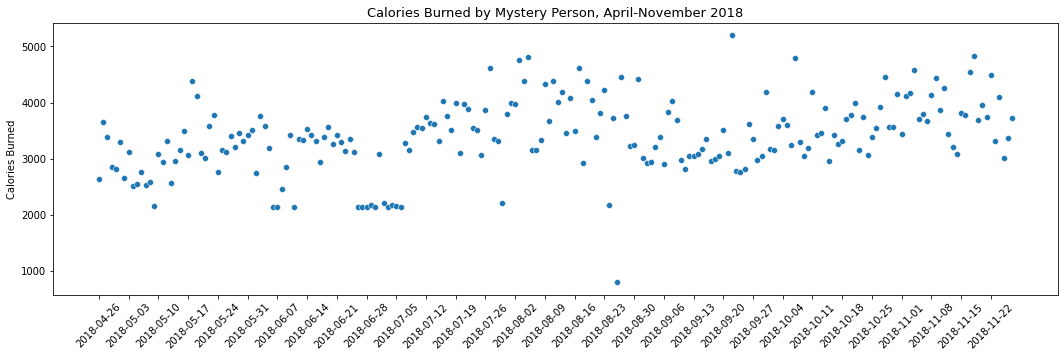

In [90]:
plt.figure(figsize=(18,5))

sns.scatterplot(data=acts, x='Date', y='Calories Burned')

plt.title('Calories Burned by Mystery Person, April-November 2018', fontsize=13)
plt.xlabel('')
plt.xticks(ticks=acts.index[range(0, len(acts), 7)], rotation=45);